<a href="https://colab.research.google.com/github/prithwis/parashar21/blob/main/P21_Retrieve_v4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://1.bp.blogspot.com/_5QlanosqxiQ/SXLOLTu7S7I/AAAAAAAAAm8/0r6C7lCxsic/S1600-R/p21-header-003.png) <br>


---


![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) ||
[Prithwis Mukerjee](http://www.yantrajaal.com) ||
Website - [Parashar21](https://parashar21.blogspot.com)<br>

#SetUp

##Installs

In [1]:
!pip -qq install pyswisseph                 # https://stackoverflow.com/questions/64277506/pip-install-options-unclear
!pip -qq install python-docx                #https://python-docx.readthedocs.io/en/latest/
!pip -qq install python_string_utils
!apt install mongodb > /dev/null

     |████████████████████████████████| 521 kB 24.1 MB/s 
     |████████████████████████████████| 5.6 MB 23.7 MB/s 




In [16]:
#Utility functions 
from pymongo import MongoClient
import pandas as pd
import dateutil
#import matplotlib.pyplot as plt
import math
import json
from docx import Document
from docx.shared import Inches
from datetime import datetime
from datetime import timedelta


In [25]:
#Load p21 modules from github
!wget -O p21.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21.py                  # all global variables
!wget -O p21utils.py -q https://raw.githubusercontent.com/prithwis/parashar21/main/utils/p21utils.py        # large number of utility functions

# ---------------------------
import p21
import p21utils
# ------------------------------------------------
# required for multiple imports of the same module
# ------------------------------------------------
import importlib
importlib.reload(p21)
importlib.reload(p21utils)

p21utils imported


<module 'p21utils' from '/content/p21utils.py'>

In [ ]:
#!cat p21utils.py

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# -------------------------------------------
# copy credentials file
!cp /content/drive/'My Drive'/Praxis/WebCredentials/clevercloudMongoDB.py credentials.py
# -------------------------------------------
# MongoDB credentials are stored here
#
from credentials import rhostName,ruserName,rpassWord,rdbName,rMongoURI
print(rdbName)
# -------------------------------------------
mongoURI = rMongoURI                                   # for remote server
client = MongoClient(mongoURI)
client.list_database_names() # ['admin', 'local']
# ----------------------------------------------
# Show existing Collections
db = client.btncgfi3a5bxyea
pd.DataFrame(list(db.list_collections()))

Mounted at /content/drive
btncgfi3a5bxyea


,name,type,options,info,idIndex
0,khawnaa42,collection,{},"{'readOnly': False, 'uuid': c562c689-fe1b-4829...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."
1,restaurants,collection,{},"{'readOnly': False, 'uuid': 44fb1466-2fc0-4786...","{'v': 2, 'key': {'_id': 1}, 'name': '_id_', 'n..."


#Analysis Procedures

In [27]:
def R511_parseChartData(c):

    p21.GLon = c['GLon']
    p21.GRet = c['GRet']
    pid = c['pid']
    p21.pName = pid['name']
    

In [28]:
def R02_AddPage():
    #p21.document.add_picture('./RashiChart.png', width=Inches(4.25))
    #p21.document.add_picture('./NavamshaChart.png', width=Inches(4.25))
    
    
    p1 = p21.document.add_paragraph(p21.pName)
    p2 = p21.document.add_paragraph()
    run_1 = p2.add_run()
    run_1.add_picture('./RashiChart.png', width=Inches(3.0))
    run_2 = p2.add_run()
    run_2.add_picture('./NavamsaChart.png', width=Inches(3.0))
    #p21.document.add_page_break()

In [29]:
def R51_processChart(c):
    R511_parseChartData(c)              # Break up database data into useful pieces
                                        # Creates two primary dicts, GLon, GRet
    for ctype in ['Rashi','Navamsa']:
        p21.ChartType = ctype
        p21utils.R11_LocateGrahaInRashi()   # Converts Graha Long to Rashi positions
                                            # Rashi name as well as Rashi name
        p21utils.R12B_drawChart_Bengal()    # Draw Chart in Bengal style
                                            # Needs to know type, Natal or Navamsha
    R02_AddPage()
    #print(c)

#Retrieve Charts 

In [7]:
kollection = db.khawnaa42                   # Set the collection to work with
c = kollection.find({},{'pid.tags':1,'pid.ck':1,'_id':0})
for crnt in c:
    print(crnt)


{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M1961101523:425.522.5788.37'}}
{'pid': {'tags': ['Author', 'Homemaker', 'PostGraduate'], 'ck': 'F1965121910:265.522.5788.37'}}
{'pid': {'tags': ['Engineer', 'Teacher', 'PostGraduate'], 'ck': 'M199010923:095.522.5788.37'}}
{'pid': {'tags': ['Biologist', 'Scientist', 'PostGraduate'], 'ck': 'F19909120:525.522.8788.37'}}
{'pid': {'tags': ['Politician', 'Administrator', 'nil'], 'ck': 'M19509179:345.523.4872.36'}}


In [8]:
c = kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'GLon':1,'GRet':1,'_id':0})
for crnt in c:
    print(crnt)

{'GLon': {'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'Ma': 196.183, 'Me': 193.17, 'Ju': 274.781, 'Ve': 153.753, 'Sa': 270.179, 'Ra': 122.089, 'Ke': 302.089}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': True, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'GLon': {'La': 310.415, 'Su': 243.701, 'Mo': 201.001, 'Ma': 273.467, 'Me': 222.269, 'Ju': 62.748, 'Ve': 284.966, 'Sa': 318.17, 'Ra': 41.248, 'Ke': 221.248}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': False, 'Ju': True, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'GLon': {'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma': 49.966, 'Me': 163.275, 'Ju': 105.898, 'Ve': 166.538, 'Sa': 265.202, 'Ra': 280.65, 'Ke': 100.65}, 'GRet': {'La': False, 'Su': False, 'Mo': False, 'Ma': False, 'Me': False, 'Ju': False, 'Ve': False, 'Sa': False, 'Ra': False, 'Ke': False}}
{'GLon': {'La': 84.138, 'Su': 145.068, 'Mo': 54.233, 'Ma': 41.525, 'Me': 138.242, 'Ju': 101.216, 'Ve': 131.788,

In [10]:
curQuery = {'pid.tags': {'$in': ['PostGraduate']}}
df = pd.DataFrame(list(kollection.find(curQuery,{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
df

,pid,GLon,GRet
0,{'name': 'soum'},"{'La': 98.204, 'Su': 178.826, 'Mo': 250.52, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."
1,{'name': 'goap'},"{'La': 310.415, 'Su': 243.701, 'Mo': 201.001, ...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."
2,{'name': 'oorahl'},"{'La': 85.351, 'Su': 172.44, 'Mo': 63.984, 'Ma...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."
3,{'name': 'njanlian'},"{'La': 84.138, 'Su': 145.068, 'Mo': 54.233, 'M...","{'La': False, 'Su': False, 'Mo': False, 'Ma': ..."


In [11]:
#df = pd.DataFrame(list(kollection.find({'pid.tags': {"$in": ['PostGraduate']}},{'pid.name':1,"_id":0,'GLon':1,'GRet':1})))
#df

#Generate Report
for all retrieved charts

11 Jan 2022
----
----
----
----


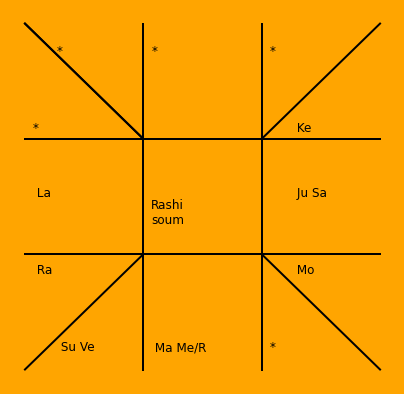

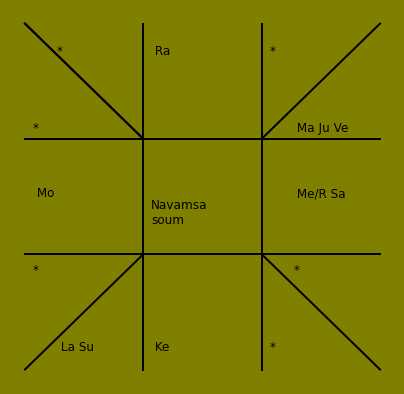

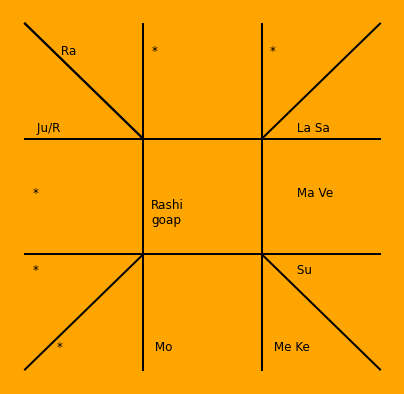

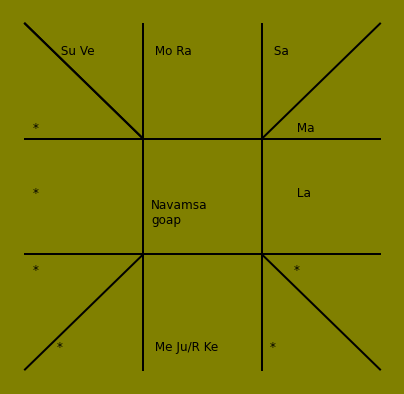

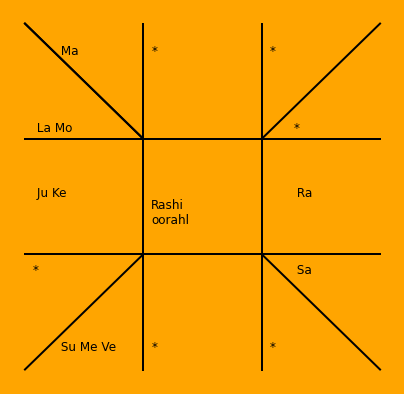

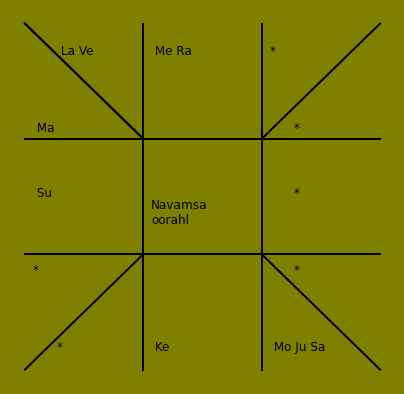

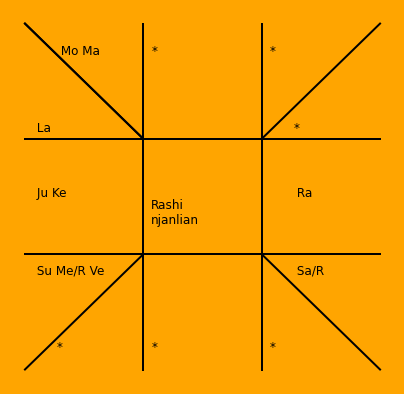

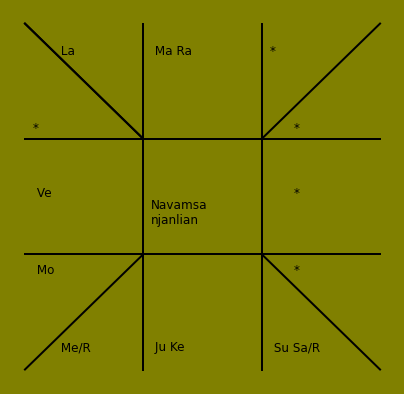

In [26]:
now = datetime.now()
fileName = 'Khawnaa_'+now.strftime("%H%M")+'.doc'
curQueryStr = json.dumps(curQuery)
# ---------------------------------------------------------
p21utils.R01_CreateReportDoc(curQueryStr)                      # Creates MS Word Doc called p21.document
# ----------------------------------------------------------
for chart in range(len(df)):
    chartData =df.iloc[chart]
    R51_processChart(chartData)
    print('----')
# ------------------------------------
p21.document.save(fileName)